In [2]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [3]:
df = aux.load_data(Path("../results_synced/wdw/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,Chinatown,CNN,DF,False,0,0,128,True,5,1,...,0.717498,0.679837,0.717498,0.729200,0.746768,NaN,NaN,NaN,NaN,NaN
1,Chinatown,CNN,DF,True,0,0,128,True,5,1,...,0.704790,0.685132,0.704790,0.724646,0.726914,0.640506,0.392147,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,58.0
2,Chinatown,CNN,DF,False,0,0,128,True,10,1,...,0.694440,0.662454,0.694440,0.703481,0.751947,NaN,NaN,NaN,NaN,NaN
3,Chinatown,CNN,DF,True,0,0,128,True,10,1,...,0.741399,0.679576,0.741399,0.724975,0.760699,1.155887,-0.979179,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,training/2023-03-29_18-30_EXP_wdw_DF_CNN_China...,58.0
4,Chinatown,CNN,DF,False,0,0,128,True,15,1,...,0.765503,0.663403,0.765503,0.701374,0.794573,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,CBF,CNN,DF,True,4,0,128,True,5,1,...,0.458064,0.467443,0.458064,0.635680,0.645227,0.965588,0.004880,training/2023-03-29_20-26_EXP_wdw_DF_CNN_CBF_f...,training/2023-03-29_20-26_EXP_wdw_DF_CNN_CBF_f...,58.0
180,CBF,CNN,DF,False,4,0,128,True,10,1,...,0.496836,0.544007,0.496836,0.707262,0.666096,NaN,NaN,NaN,NaN,NaN
181,CBF,CNN,DF,True,4,0,128,True,10,1,...,0.469791,0.496083,0.469791,0.732014,0.704760,0.854084,0.221356,training/2023-03-29_20-26_EXP_wdw_DF_CNN_CBF_f...,training/2023-03-29_20-26_EXP_wdw_DF_CNN_CBF_f...,59.0
182,CBF,CNN,DF,False,4,0,128,True,15,1,...,0.470225,0.499186,0.470225,0.668531,0.632090,NaN,NaN,NaN,NaN,NaN


In [4]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [6]:
df.groupby(["dataset", "arch", 	"window_length", "pretrain", 'window_time_stride', "stride_series", 'window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride stride_series window_patt_stride                
ArrowHead CNN  5             False    1                  True          1                    113.000000   
CBF       CNN  5             False    1                  True          1                     70.600000   
                             True     1                  True          1                     24.200000   
               10            False    1                  True          1                     70.400000   
                             True     1                  True          1                     37.400000   
               15            False    1                  True          1                     54.200000   
                             True     1                  True          1                     37.500000   
Chinatown CNN  5             False    1                  False         3                     76.200000   
                                                         True          1                     77.600000   
                                                                       2                     70.600000   
                                      2                  True          1                     75.800000   
                                      3                  True          1                    102.400000   
                                      4                  True          1                     65.600000   
                                      5                  True          1                     73.600000   
                             True     1                  False         3                     62.600000   
                                                         True          1                     79.800000   
                                                                       2                     91.800000   
                                      2                  False         1                     88.200000   
                                                         True          1                    101.000000   
                                      3                  False         1                     94.800000   
                                                         True          1                     93.800000   
                                      4                  False         1                     79.400000   
                                                         True          1                     77.000000   
                                      5                  False         1                     70.000000   
                                                         True          1                     72.800000   
               10            False    1                  True          1                    109.000000   
                             True     1                  True          1                     72.000000   
               15            False    1                  True          1                    104.400000   
                             True     1                  True          1                     88.600000   
GunPoint  CNN  5             False    1                  True          1                     86.800000   
                                      2                  True          1                     80.800000   
                                      3                  True          1                    113.000000   
                             True     1                  True          1                     73.400000   
                                      2                  False         1                     32.666667   
                                                         True          1                     50.200000   
               10            False    1                  True          1                    107.000000   
                             True     1                  True  

In [33]:
df[df["window_time_stride"] == 1][df["window_patt_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                         113.0   
CBF       CNN  5             False    1                  1                          70.6   
                             True     1                  1                          24.2   
               10            False    1                  1                          70.4   
                             True     1                  1                          37.4   
               15            False    1                  1                          54.2   
                             True     1                  1                          37.5   
Chinatown CNN  5             False    1                  1                          77.6   
                             True     1                  1                          79.8   
               10            False    1                  1                         109.0   
                             True     1                  1                          72.0   
               15            False    1                  1                         104.4   
                             True     1                  1                          88.6   
GunPoint  CNN  5             False    1                  1                          86.8   
                             True     1                  1                          73.4   
               10            False    1                  1                         107.0   
                             True     1                  1                          54.2   
               15            False    1                  1                          90.0   
                             True     1                  1                          67.0   

                                                                             pre_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                           NaN   
CBF       CNN  5             False    1                  1                           NaN   
                             True     1                  1                          57.8   
               10            False    1                  1                           NaN   
                             True     1                  1                          58.6   
               15            False    1                  1                           NaN   
                             True     1                  1                          59.0   
Chinatown CNN  5             False    1                  1                           NaN   
                             True     1                  1                          57.8   
               10            False    1                  1                           NaN   
                             True     1                  1                          58.4   
               15            False    1                  1                           NaN   
                             True     1                  1                          57.6   
GunPoint  CNN  5             False    1                  1                           NaN   
                             True     1                  1                          58.2   
               10            False    1                  1                           NaN   
                             True     1                  1                          58.6   
               15            False    1                  1                           NaN   
                             True     1                  1                          53.0   

                                                                             target_test_acc  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                    
ArrowHead CNN  5   

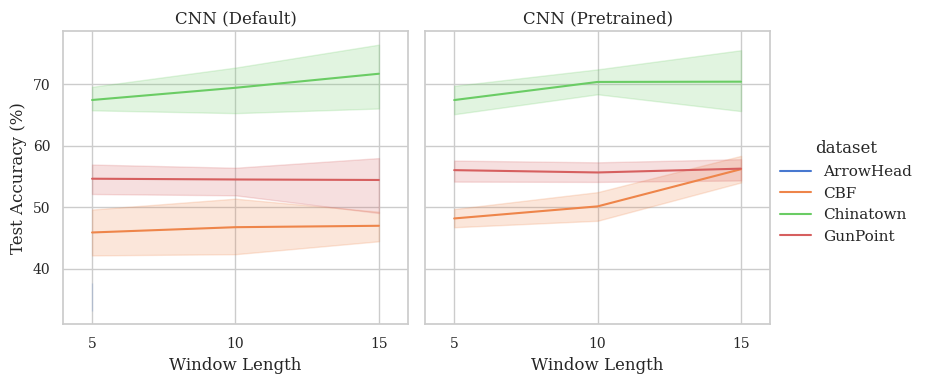

In [16]:
data = df[df["window_time_stride"] == 1][df["window_patt_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
# g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
#                 kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
#                 errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
#                 "gridspec_kws": {}});
g = sns.relplot(data=data, x='window_length', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=2, markers="True", facet_kws={"despine": False})
for ax in g.axes.flat:
    ax.set_xticks([5, 10, 15])
    ax.set_xlim(4,16)

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Length");

In [27]:
df[df["window_length"] == 5][df["window_patt_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride', "stride_series"])[cols].count()


tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride stride_series                
ArrowHead CNN  5             False    1                  1                  True                     2   
CBF       CNN  5             False    1                  1                  True                     5   
                             True     1                  1                  True                     5   
Chinatown CNN  5             False    1                  1                  True                     5   
                                      2                  1                  True                     5   
                                      3                  1                  True                     5   
                                      4                  1                  True                     5   
                                      5                  1                  True                     5   
                             True     1                  1                  True                     5   
                                      2                  1                  False                    5   
                                                                            True                     5   
                                      3                  1                  False                    5   
                                                                            True                     5   
                                      4                  1                  False                    5   
                                                                            True                     5   
                                      5                  1                  False                    5   
                                                                            True                     5   
GunPoint  CNN  5             False    1                  1                  True                     5   
                                      2                  1                  True                     5   
                                      3                  1                  True                     2   
                             True     1                  1                  True                     5   
                                      2                  1                  False                    3   
                                                                            True                     5   

                                                                                           pre_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride stride_series                
ArrowHead CNN  5             False    1                  1                  True                     0   
CBF       CNN  5             False    1                  1                  True                     0   
                             True     1                  1                  True                     5   
Chinatown CNN  5             False    1                  1                  True                     0   
                                      2                  1                  True                     0   
                                      3                  1                  True                     0   
                                      4                  1                  True                     0   
                                      5                  1                  True                     0   
                             True     1                  1                  True                     5   
                                      2                  1                  False                    5   
                                                                            True                     5   
                                      3                  1    

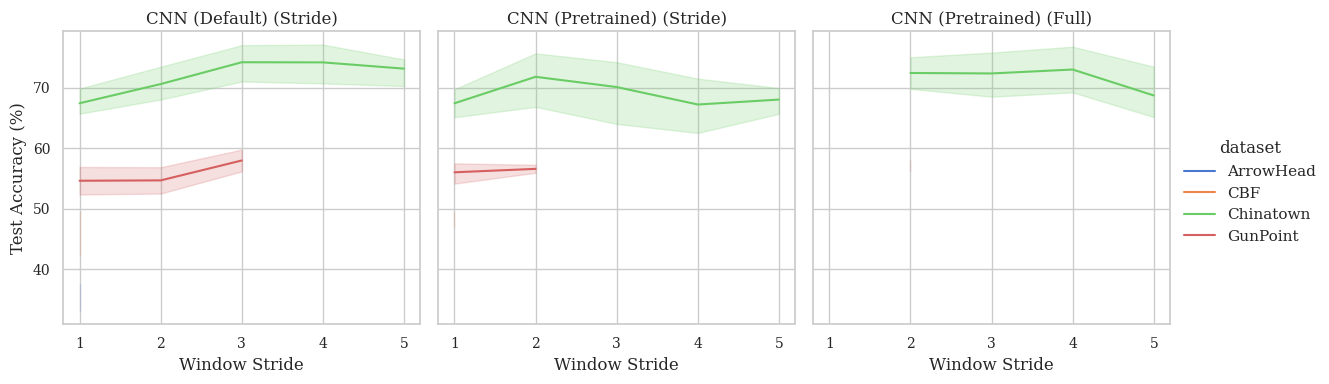

In [26]:
data = df[df["window_length"] == 5][df["window_patt_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"}) + " " + data["stride_series"].replace({True: "(Stride)", False: "(Full)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x='window_time_stride', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=3, markers="True", facet_kws={"despine": False})

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride");

In [8]:
df[df["window_length"] == 5][df["window_time_stride"] == 1].groupby(["dataset", "arch","window_length", "pretrain", 'window_time_stride','window_patt_stride'])[cols].mean()

tgt_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                         113.0   
CBF       CNN  5             False    1                  1                          70.6   
                             True     1                  1                          24.2   
Chinatown CNN  5             False    1                  1                          77.6   
                                                         2                          70.6   
                                                         3                          76.2   
                             True     1                  1                          79.8   
                                                         2                          91.8   
                                                         3                          62.6   
GunPoint  CNN  5             False    1                  1                          86.8   
                             True     1                  1                          73.4   

                                                                             pre_nepochs  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                
ArrowHead CNN  5             False    1                  1                           NaN   
CBF       CNN  5             False    1                  1                           NaN   
                             True     1                  1                          57.8   
Chinatown CNN  5             False    1                  1                           NaN   
                                                         2                           NaN   
                                                         3                           NaN   
                             True     1                  1                          57.8   
                                                         2                          58.6   
                                                         3                          59.0   
GunPoint  CNN  5             False    1                  1                           NaN   
                             True     1                  1                          58.2   

                                                                             target_test_acc  \
dataset   arch window_length pretrain window_time_stride window_patt_stride                    
ArrowHead CNN  5             False    1                  1                          0.353909   
CBF       CNN  5             False    1                  1                          0.459065   
                             True     1                  1                          0.481874   
Chinatown CNN  5             False    1                  1                          0.674454   
                                                         2                          0.696905   
                                                         3                          0.667416   
                             True     1                  1                          0.674356   
                                                         2                          0.665298   
                                                         3                          0.672206   
GunPoint  CNN  5             False    1                  1                          0.546471   
                             True     1                  1                          0.560416   

                                                                             target_test_auroc  
dataset   arch window_length pretrain window_time_stride window_patt_stride                     
ArrowHead CNN  5             False    1                  1                            0.555725  
CBF       CNN  5             False    1                  1                            0.634480  
                             True     1       

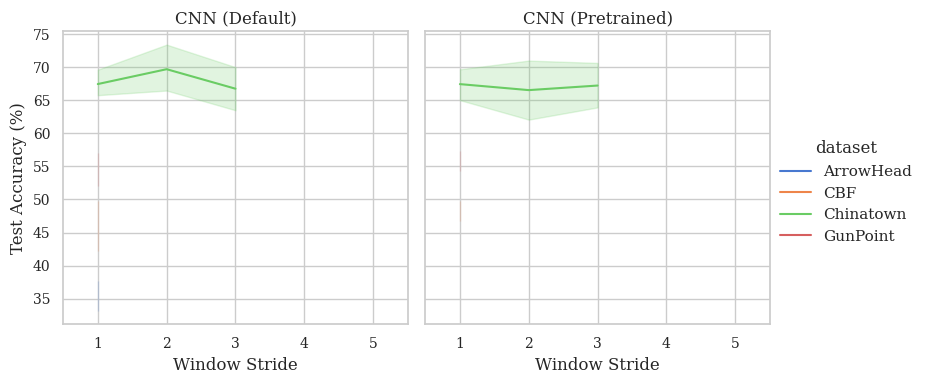

In [31]:
data = df[df["window_length"] == 5][df["window_time_stride"] == 1].copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data['pret_event_multiplier'] = data['pret_event_multiplier'].astype("category")
data["xd"] = data["pretrain"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["col"] = data["arch"] + " " + data["xd"]
data.sort_values(["dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x='window_patt_stride', y="target_test_acc", hue='dataset', col="col", kind="line", 
                height=4, aspect=1, legend=True, palette="muted", col_wrap=2, markers="True", facet_kws={"despine": False})

for ax in g.axes.flat:
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xlim(0.5,5.5)

g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride");